In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
        'weight' : 'normal'}

matplotlib.rc('font', **font)
from afrc import AnalyticalFRC
import protfasta
import metapredict as meta
from sparrow import Protein
import pandas as pd



### Read in data
First read in the data and parse out the relevant columns into arrays

In [2]:
data = pd.read_csv('data/IDR_dimensions.csv')

rg     = data['Rg (Å)'].to_numpy()
errors = data['Error (Å)'].to_numpy()
seqs   = [x.strip() for x in data['Seq'].to_list()]
seq_lens = [len(x) for x in seqs]
names  = data['Name']

# this list comprehension loops over each sequence and calculates the AFRC-derived
# Rg for each sequence
rg_afrc = [AnalyticalFRC(i).get_mean_radius_of_gyration() for i in seqs]

In [3]:
# Print some summary statistics
#

# all data to one polymer model 
X = np.polyfit(np.log(seq_lens), np.log(rg),1)
print(f'Overall fitting parameters are nu = {round(X[0],2)} and R0 = {round(np.exp(X[1]),2)}  ')

# Fit AFRC-derived Rg values to a polymer model (nu should be 0.5 [!!], R0 will depend on composition)
X_afrc = np.polyfit(np.log(seq_lens), np.log(rg_afrc),1)
print(f'Overall fitting for ARFC are nu = {round(X_afrc[0],2)} and R0 = {round(np.exp(X_afrc[1]),2)}  ')

print(f'We have a total of {len(rg)} radii of gyration!')

Overall fitting parameters are nu = 0.49 and R0 = 2.91  
Overall fitting for ARFC are nu = 0.5 and R0 = 2.5  
We have a total of 145 radii of gyration!


### Build some synthetic data
The cell below generates synethtic scaling lines for a few different polymer modes

In [4]:
# basal X values
xvals = np.arange(0,1000)

# this would be a best fit line
yvals = np.exp(X[1])*np.power(xvals,X[0]) 

# this is the AFRC fit line
yvals_afrc = np.exp(X_afrc[1])*np.power(xvals,X_afrc[0]) 

# THIS is the scaling expected from a denatured polypeptide. The values here are
# taken directly from ...
yvals_kohn = 1.98*np.power(xvals,0.598) 

# THIS is the scaling expected for globular single-domain proteins. The values ere 
# are taken from Fig. 3A in Holehouse & Pappu, Ann. Rev. Biophys. 2018. These values 
# are not actually reported in that paper but they're right because, well, I did that
# analysis :)
yvals_globule = 2.86*np.power(xvals,0.33) 


## Define emprical upper and lower bounds
# we use 0.8 and 1.46 as emprical prefactors based on data from simulations and experiments
# as scalars that scale the limit of accessible Rg values over a conceptually sensible 
# range of IDR dimensions
yvals_min = 0.8*np.exp(X_afrc[1])*np.power(xvals,X_afrc[0]) 
yvals_max = 1.46*np.exp(X_afrc[1])*np.power(xvals,X_afrc[0]) 

### Generate Fig 8A

meta NOT subset; don't know how to subset; dropped


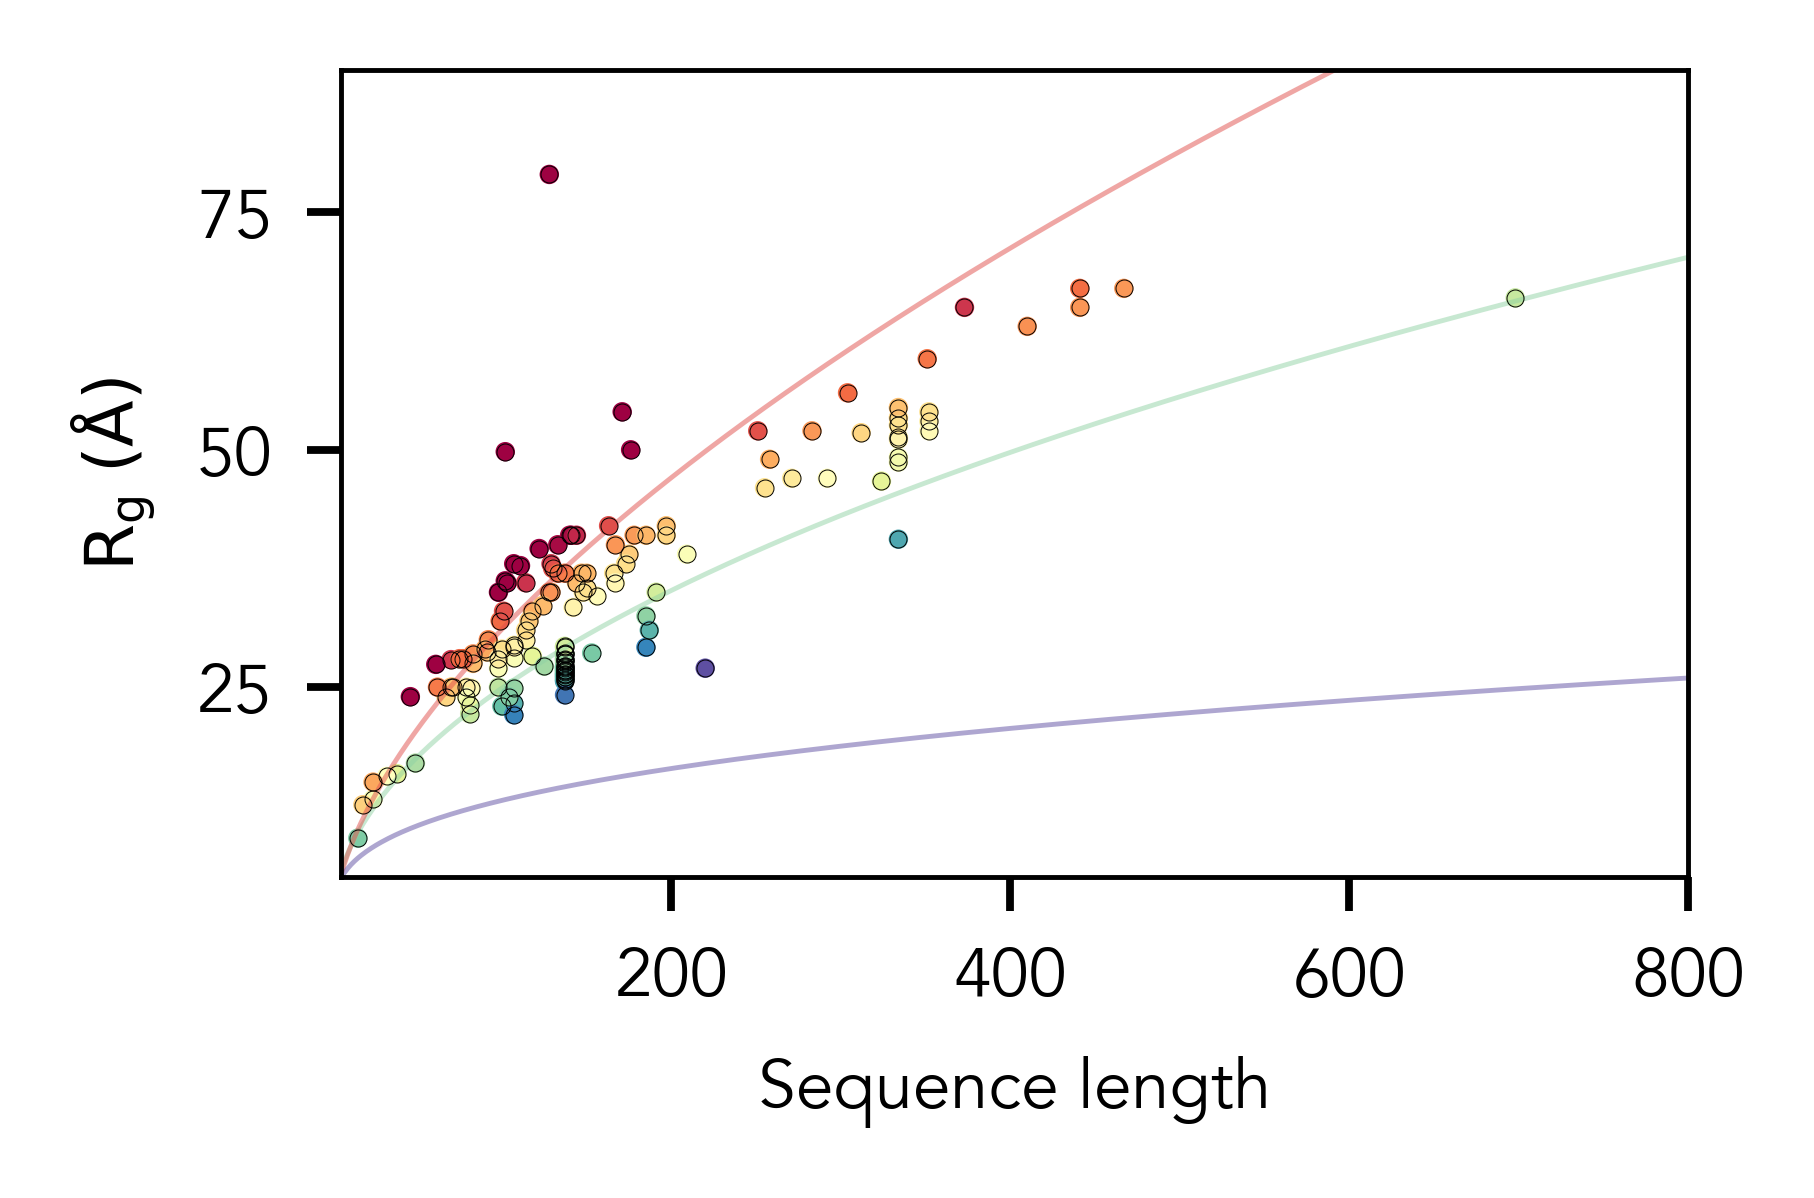

In [5]:
figure(None, (2.7,1.8), dpi=350)


# note these are commented out because we felt the plot was to busy but can be uncommented
# to see how the best-fit line to the data follows
#plt.plot(xvals, yvals,'-', color='k', alpha=1, linewidth=0.8)       
#plt.plot(xvals, yvals,'--', color='#fee28f', alpha=1, linewidth=0.8)       


plt.plot(xvals, yvals_afrc,'-', alpha=0.5, linewidth=0.5, color='#90d2a4')    
plt.plot(xvals, yvals_kohn,'-', alpha=0.5, linewidth=0.5, color='#e04e4b')    
plt.plot(xvals, yvals_globule,'-', alpha=0.5, linewidth=0.5, color='#5e4fa2')    


# NOTE - we're using rg_norm here ONLY for color and we max out at 1.4 and min at 0.8
# so the dynamic range of COLORS straddles the relevant space. 
rg_norm = np.array(rg)/np.array(rg_afrc)
max_rg_norm = 1.4
min_rg_norm = 0.8
rg_norm[rg_norm > max_rg_norm] = max_rg_norm
rg_norm[rg_norm < min_rg_norm] = min_rg_norm



plt.scatter(seq_lens, rg, c=rg_norm, s=1, alpha=1, cmap='Spectral_r')
plt.plot(seq_lens, rg, '.', ms=3.5, mfc='None', mec='k', mew=0.1)

rg_afrc_norm = np.array(rg_afrc)/np.array(rg_afrc)

#plt.scatter(seq_lens, rg_afrc, c=rg_afrc_norm, s=2, alpha=0.6, cmap='Spectral_r', vmin=0.8, vmax=1.4)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.ylabel(r'$\rmR_g \;(\AA)$', fontsize=7)
plt.xlabel(r'Sequence length', fontsize=7)

plt.ylim([5,90])
plt.xlim([5,800])
plt.tight_layout()
plt.savefig('panel_8A.pdf')

# delete rg_norm from working memory so you can't accidentally use this version
# later!!
del rg_norm
    

## Generate Figure 8B
This is basicaly the same as 8A except we plot the lower and upper bounds. 

meta NOT subset; don't know how to subset; dropped


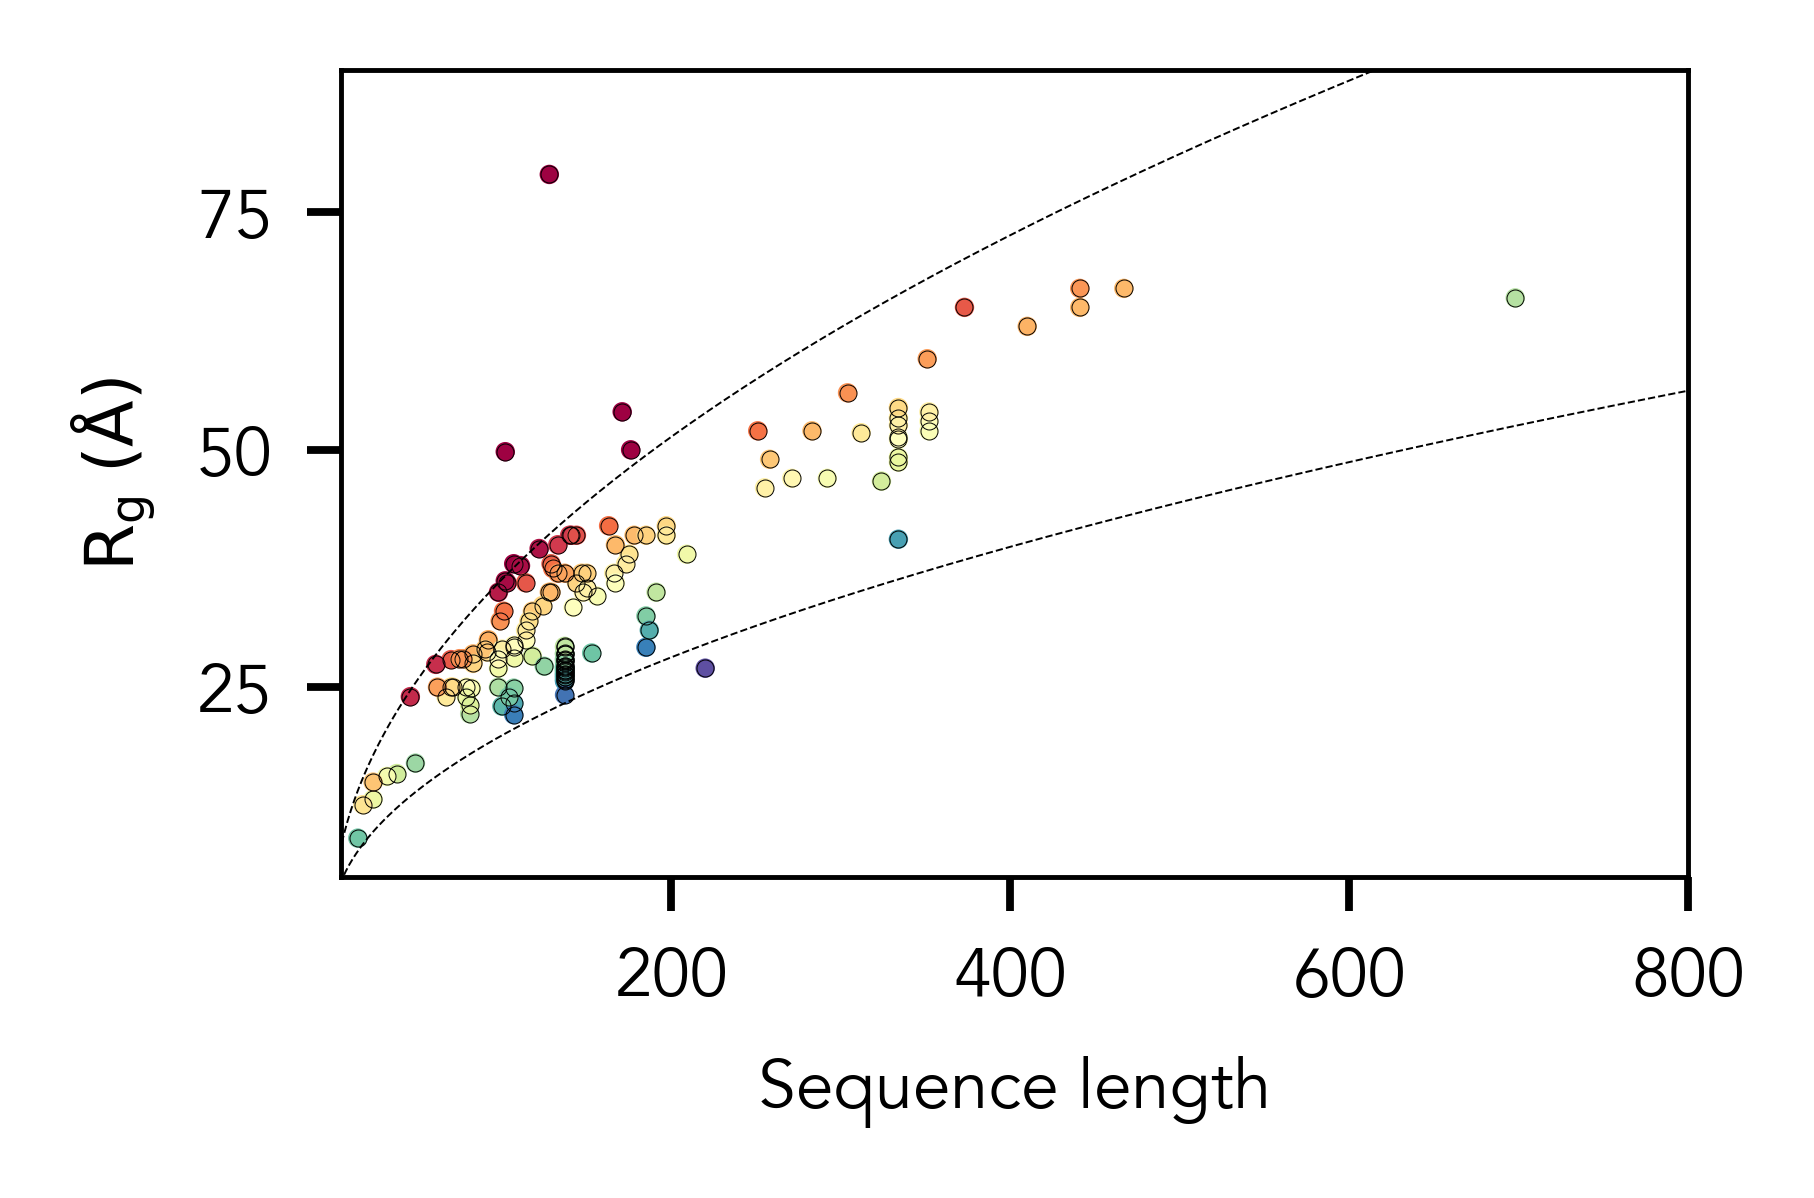

In [6]:
figure(None, (2.7,1.8), dpi=350)

# this defines the upper and lower bounds for likely IDR dimensions
plt.plot(xvals, yvals_min,'--k', linewidth=0.2)
plt.plot(xvals, yvals_max,'--k', linewidth=0.2)

rg_norm = np.array(rg)/np.array(rg_afrc)
max_rg_norm = 1.45
min_rg_norm = 0.8
rg_norm[rg_norm > max_rg_norm] = max_rg_norm
rg_norm[rg_norm < min_rg_norm] = min_rg_norm

plt.scatter(seq_lens, rg, c=rg_norm, s=1, alpha=1, cmap='Spectral_r')
plt.plot(seq_lens, rg, '.', ms=3.5, mfc='None', mec='k', mew=0.1)

rg_afrc_norm = np.array(rg_afrc)/np.array(rg_afrc)

#plt.scatter(seq_lens, rg_afrc, c=rg_afrc_norm, s=2, alpha=0.6, cmap='Spectral_r', vmin=0.8, vmax=1.4)


plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.ylabel(r'$\rmR_g \;(\AA)$', fontsize=7)
plt.xlabel(r'Sequence length', fontsize=7)

plt.ylim([5,90])
plt.xlim([5,800])
plt.tight_layout()

plt.savefig('panel_8B.pdf')
    

## Generate Fig. S5
This generates the max - min vals to show how we expect IDR dimensions to vary as a function of chain length in terms of possible dynamic range of Rgs.

Truthfully I'm not sure how useful this is but I still think its crazy that depending on sequence properties it's conceivable that a 200 residue IDR could vary by ~20 Å

meta NOT subset; don't know how to subset; dropped


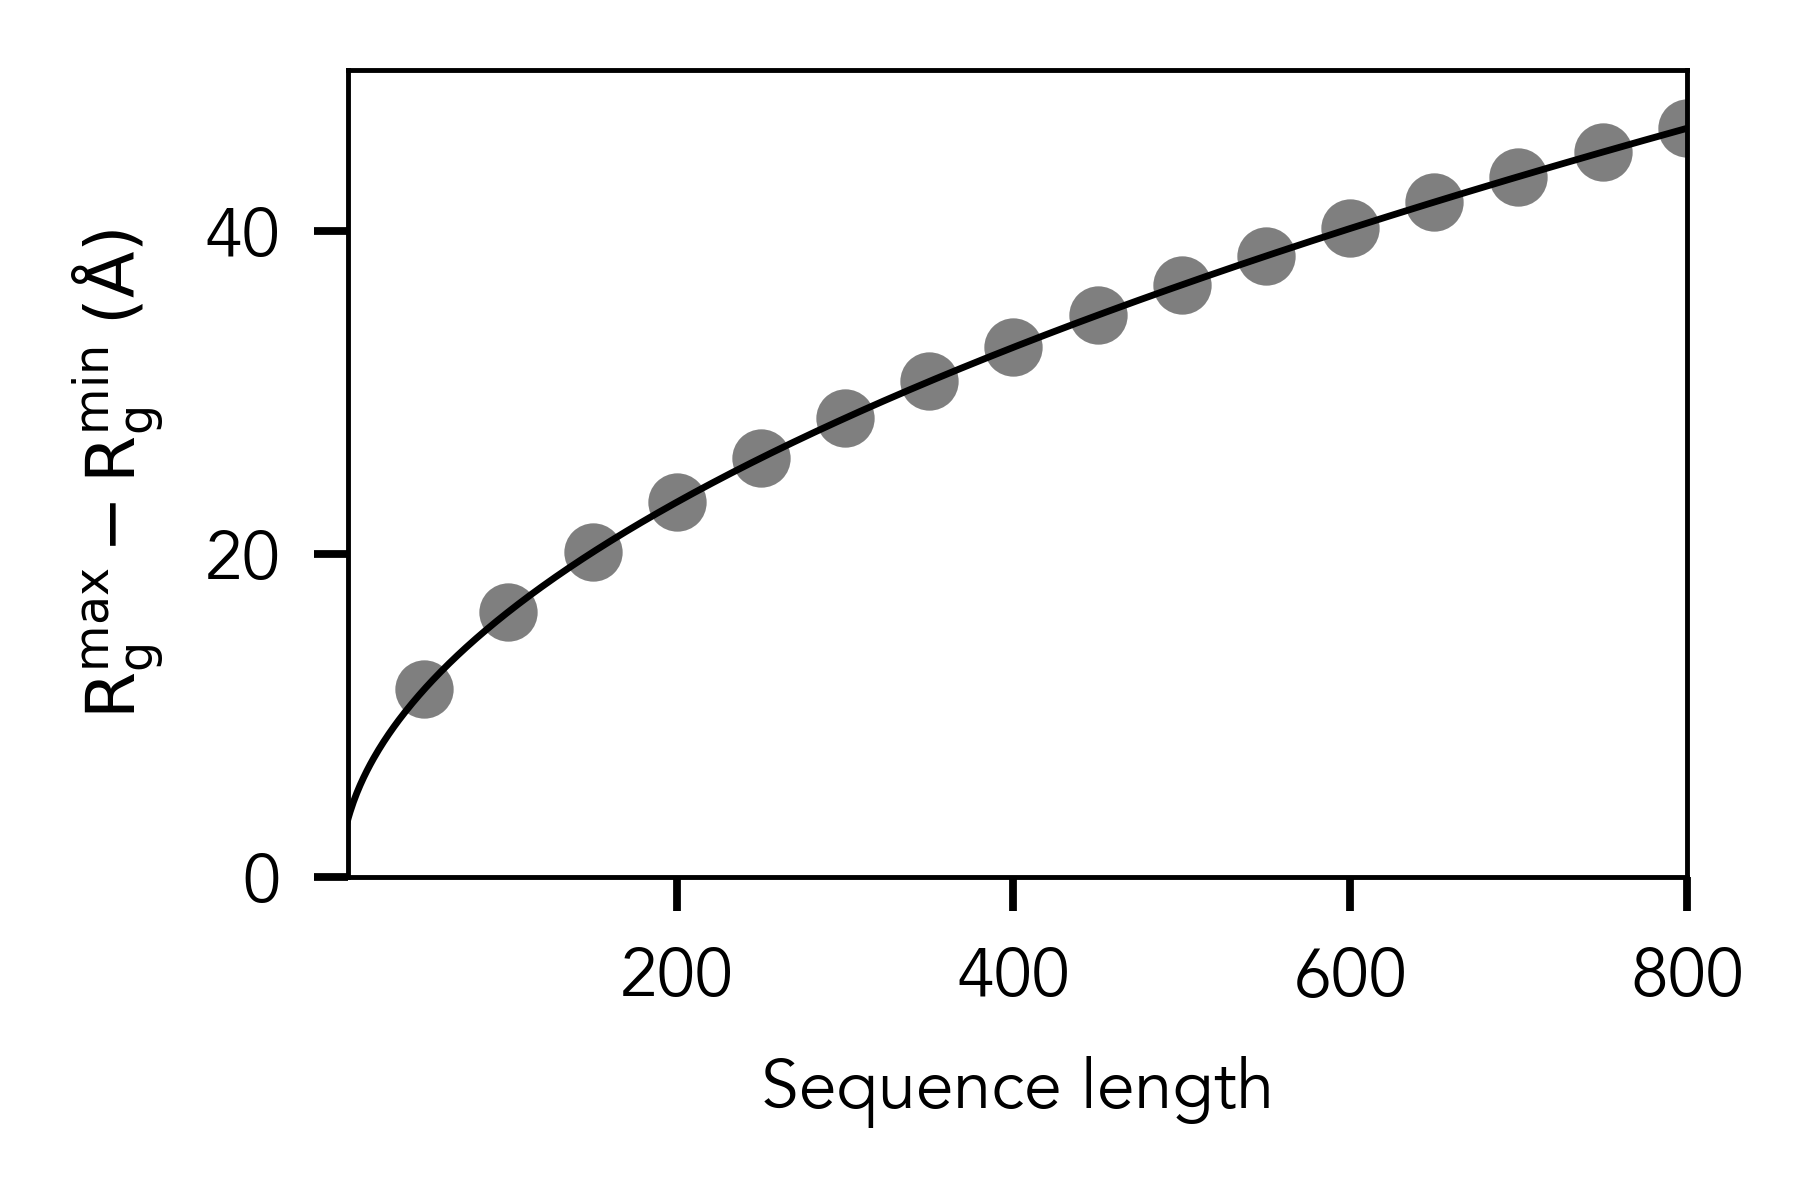

In [7]:
figure(None, (2.7,1.8), dpi=350)

yval_diff = yvals_max - yvals_min

plt.plot(xvals, yval_diff,'-', linewidth=0.7, color='k')    
plt.plot(xvals[50::50], yval_diff[50::50],'o', linewidth=1, color='k', ms=6, alpha=0.5,mew=0)    

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.ylabel(r'$\rmR_g^{max} -R_g^{min} \;(\AA)$', fontsize=7)
plt.xlabel(r'Sequence length', fontsize=7)

plt.ylim([0,50])
plt.xlim([5,800])
plt.tight_layout()
plt.savefig('supplementary_delta_Rg.pdf')


### Remove spuriously-large values
The code block below uses a hard cutoff of 1.5xthe AFRC value as designating an Rg value as spuriously large ... As a word of caution, small amounts of aggregation/oligomerization can lead to a rollover in the Guinier regime which in turn can mean the inferred Rg is slightly too large. We tentatively suggest this may be what's

In [8]:

rg_norm = np.array(rg)/np.array(rg_afrc)

corrected_norm = []
corrected_seq_lens = []
corrected_seqs = []
corrected_rg = []
corrected_rg_afrc = []
for i in range(len(rg_norm)):
    if rg_norm[i]<1.5:
        corrected_norm.append(rg_norm[i])
        corrected_seq_lens.append(seq_lens[i])
        corrected_seqs.append(seqs[i])
        corrected_rg.append(rg[i])
        corrected_rg_afrc.append(rg_afrc[i])
        

corrected_norm = np.array(corrected_norm)        


meta NOT subset; don't know how to subset; dropped


0.8467627085549354
0.9138797316100784
141
6.3491521443879515


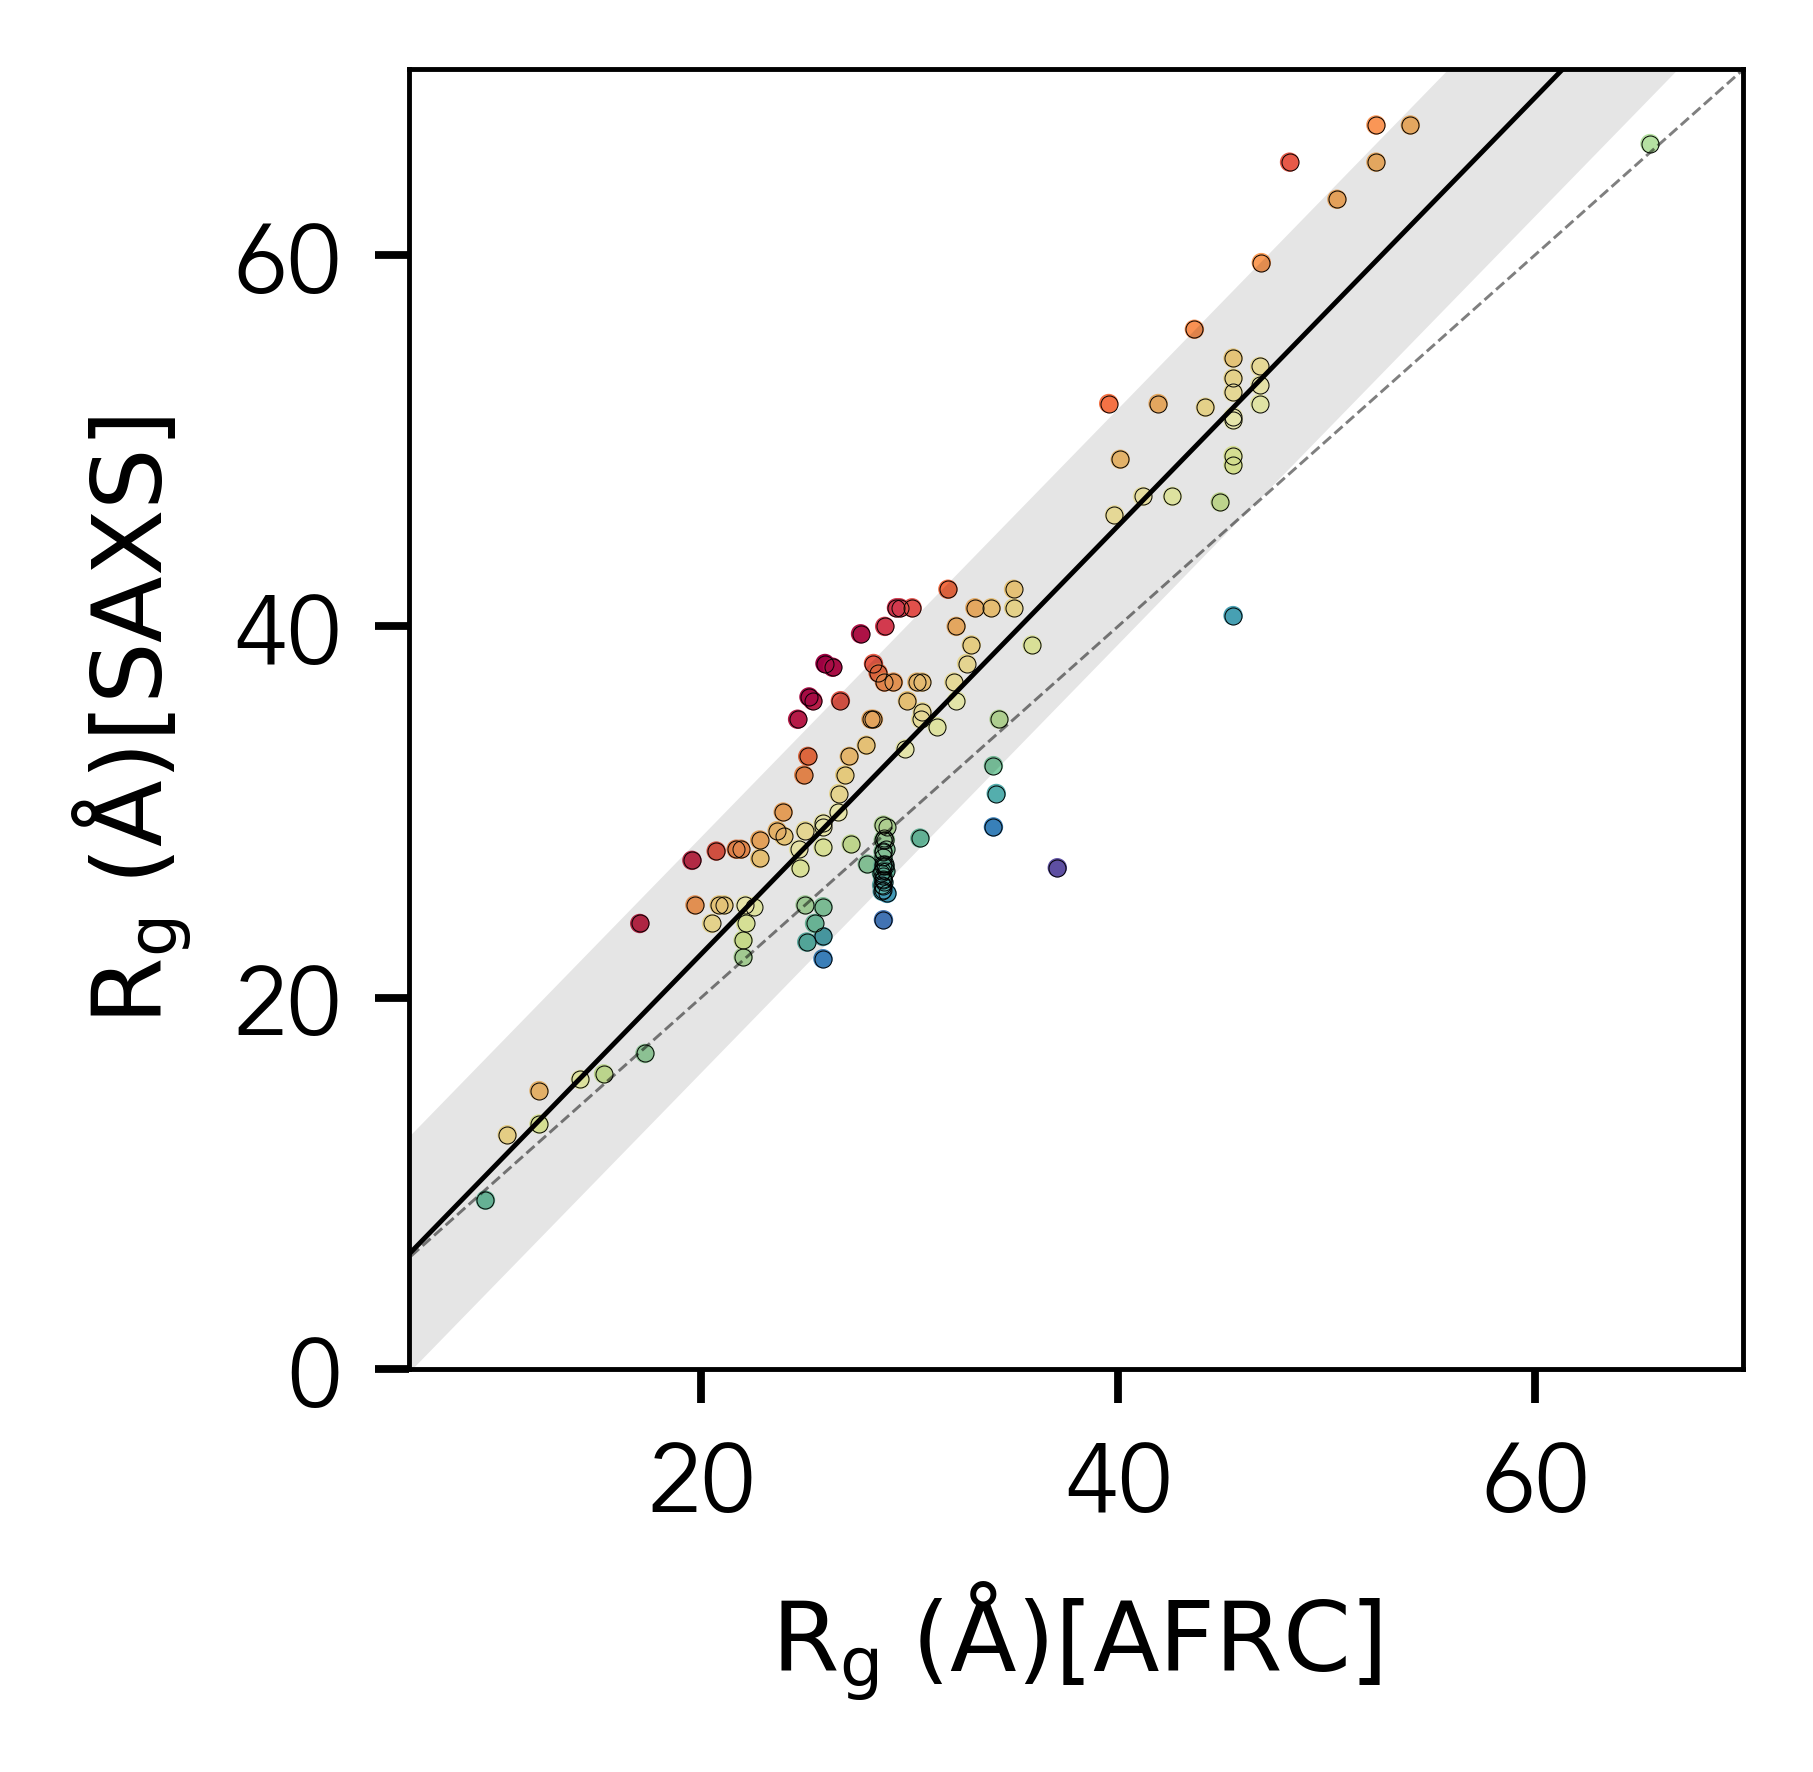

In [9]:
figure(None, (2.7, 2.7), dpi=350)


corrected_norm[corrected_norm > max_rg_norm] = max_rg_norm
corrected_norm[corrected_norm < min_rg_norm] = min_rg_norm

plt.scatter(corrected_rg_afrc, corrected_rg, c=corrected_norm, s=1, alpha=1, cmap='Spectral_r')
plt.plot(corrected_rg_afrc, corrected_rg, '.', ms=3.5, mfc='None', mec='k', mew=0.1)

# print correlation with/without outliers
print(np.corrcoef(rg, rg_afrc)[0][1])
print(np.corrcoef(corrected_rg, corrected_rg_afrc)[0][1])

# calculate RMSE
RMSE = np.sqrt(np.mean(np.power(np.array(corrected_rg_afrc) - np.array(corrected_rg),2)))

pfit = np.polyfit(corrected_rg_afrc, corrected_rg,1)

local_xvals = np.arange(0,80,10)
local_yvals = local_xvals*pfit[0]+pfit[1]

plt.plot(local_xvals,local_yvals,'-k', linewidth=0.5)
plt.plot([0,80],[0,80],'--k', linewidth=0.3, alpha=0.5)


upper = local_yvals + RMSE
lower = local_yvals - RMSE
ax = plt.gca()

ax.fill_between(local_xvals, lower, upper, alpha=0.1, color='k', linewidth=0)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel(r'$\rmR_g \;(\AA) [AFRC]$', fontsize=10)
plt.ylabel(r'$\rmR_g \;(\AA) [SAXS]$', fontsize=10)


plt.ylim([0,70])
plt.xlim([6,70])
plt.tight_layout()
plt.savefig('panel_8C.pdf')
print(len(corrected_norm))
print(RMSE)

In [10]:
min(corrected_norm)

0.8

In [11]:
np.max(corrected_norm)

1.45

meta NOT subset; don't know how to subset; dropped


0.2695035460992908


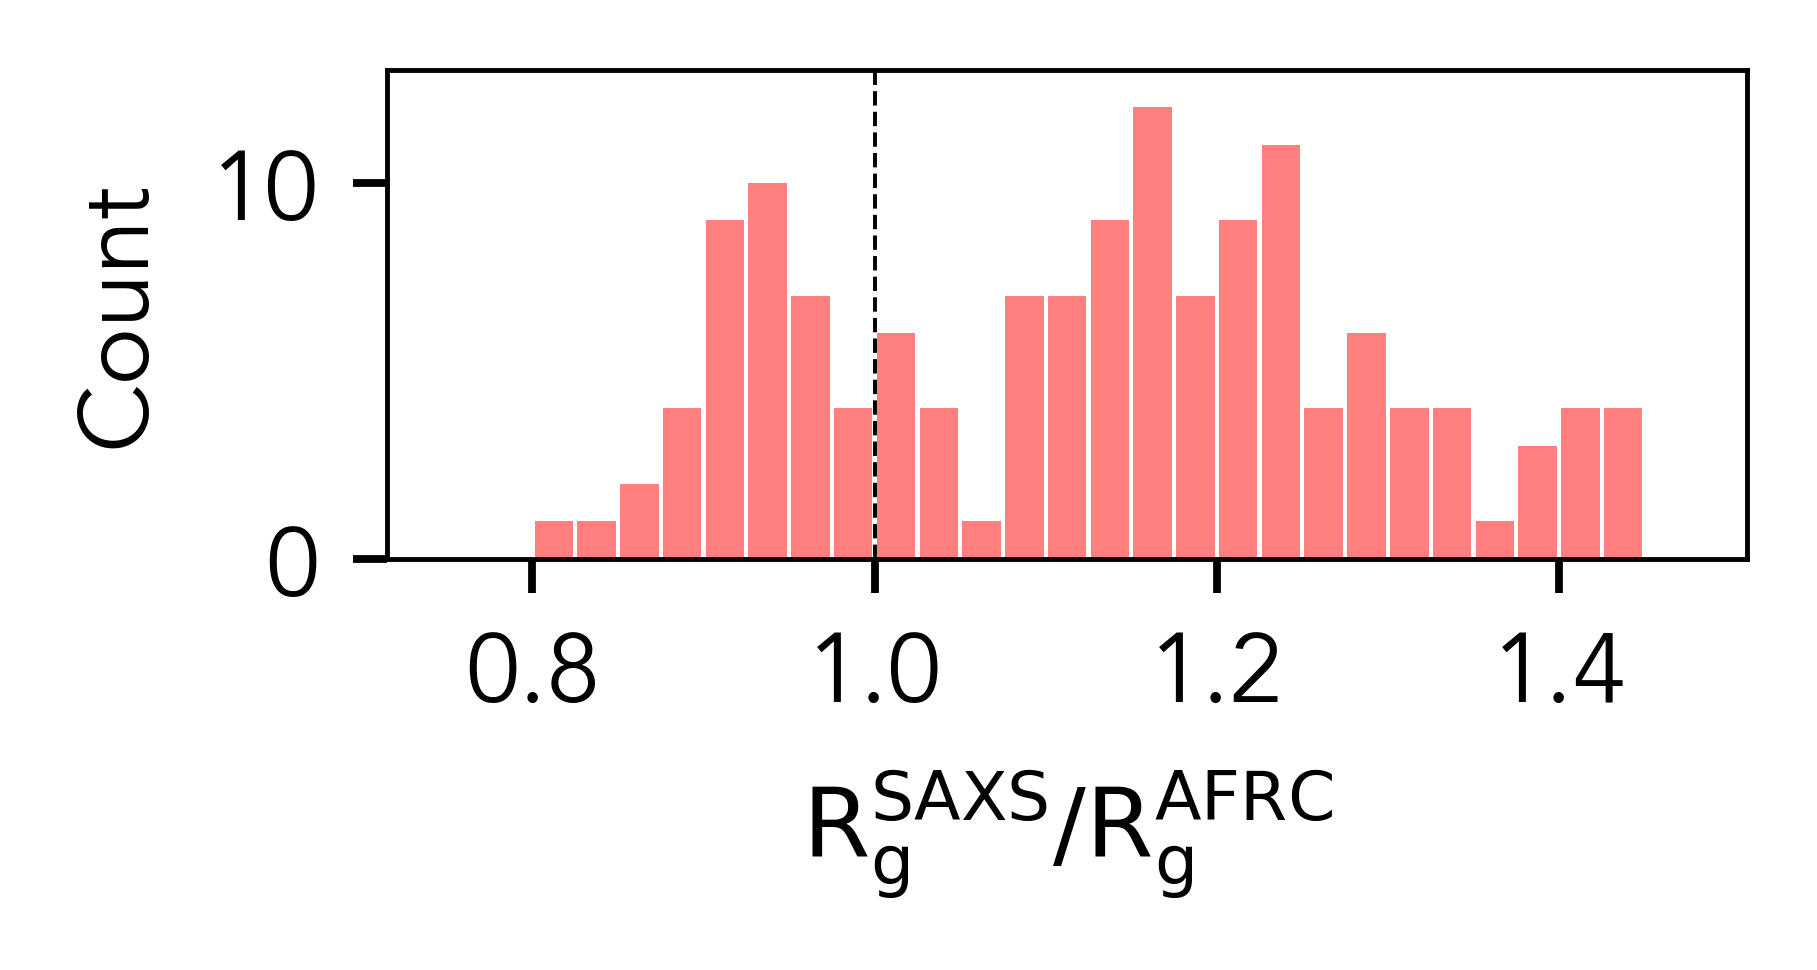

In [12]:
figure(None, (2.7, 1.5), dpi=350)
bin_width=0.025
bins = np.arange(0.75,1.5,bin_width)
[a,b] = np.histogram(corrected_norm, bins=bins)

below = 0
for i in corrected_norm:
    if i < 1:
        below = below+1
print(below/len(corrected_norm))

plot_bins = (b+0.5*bin_width)[:-1]
plt.bar(plot_bins, a, width=bin_width*0.9, color='r', alpha=0.5)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.plot([1,1],[0,13],'--k',linewidth=0.4)

plt.ylim([0,13])


plt.xlabel(r'$\rmR_g^{SAXS} / \rmR_g^{AFRC} $', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.savefig('panel_9A.pdf')


In [13]:
def sigmoid(v, k, plateau=1, theta=2, base=0):
    return base + (plateau / (1 + np.power((k/v),theta)))

/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_59868/1438919149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return base + (plateau / (1 + np.power((k/v),theta)))
/Users/alex/miniconda3/envs/neuron38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alex/miniconda3/envs/neuron38/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/alex/miniconda3/envs/neuron38/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alex/miniconda3/envs/neuron38/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Use

[[1.         0.58316284]
 [0.58316284 1.        ]]


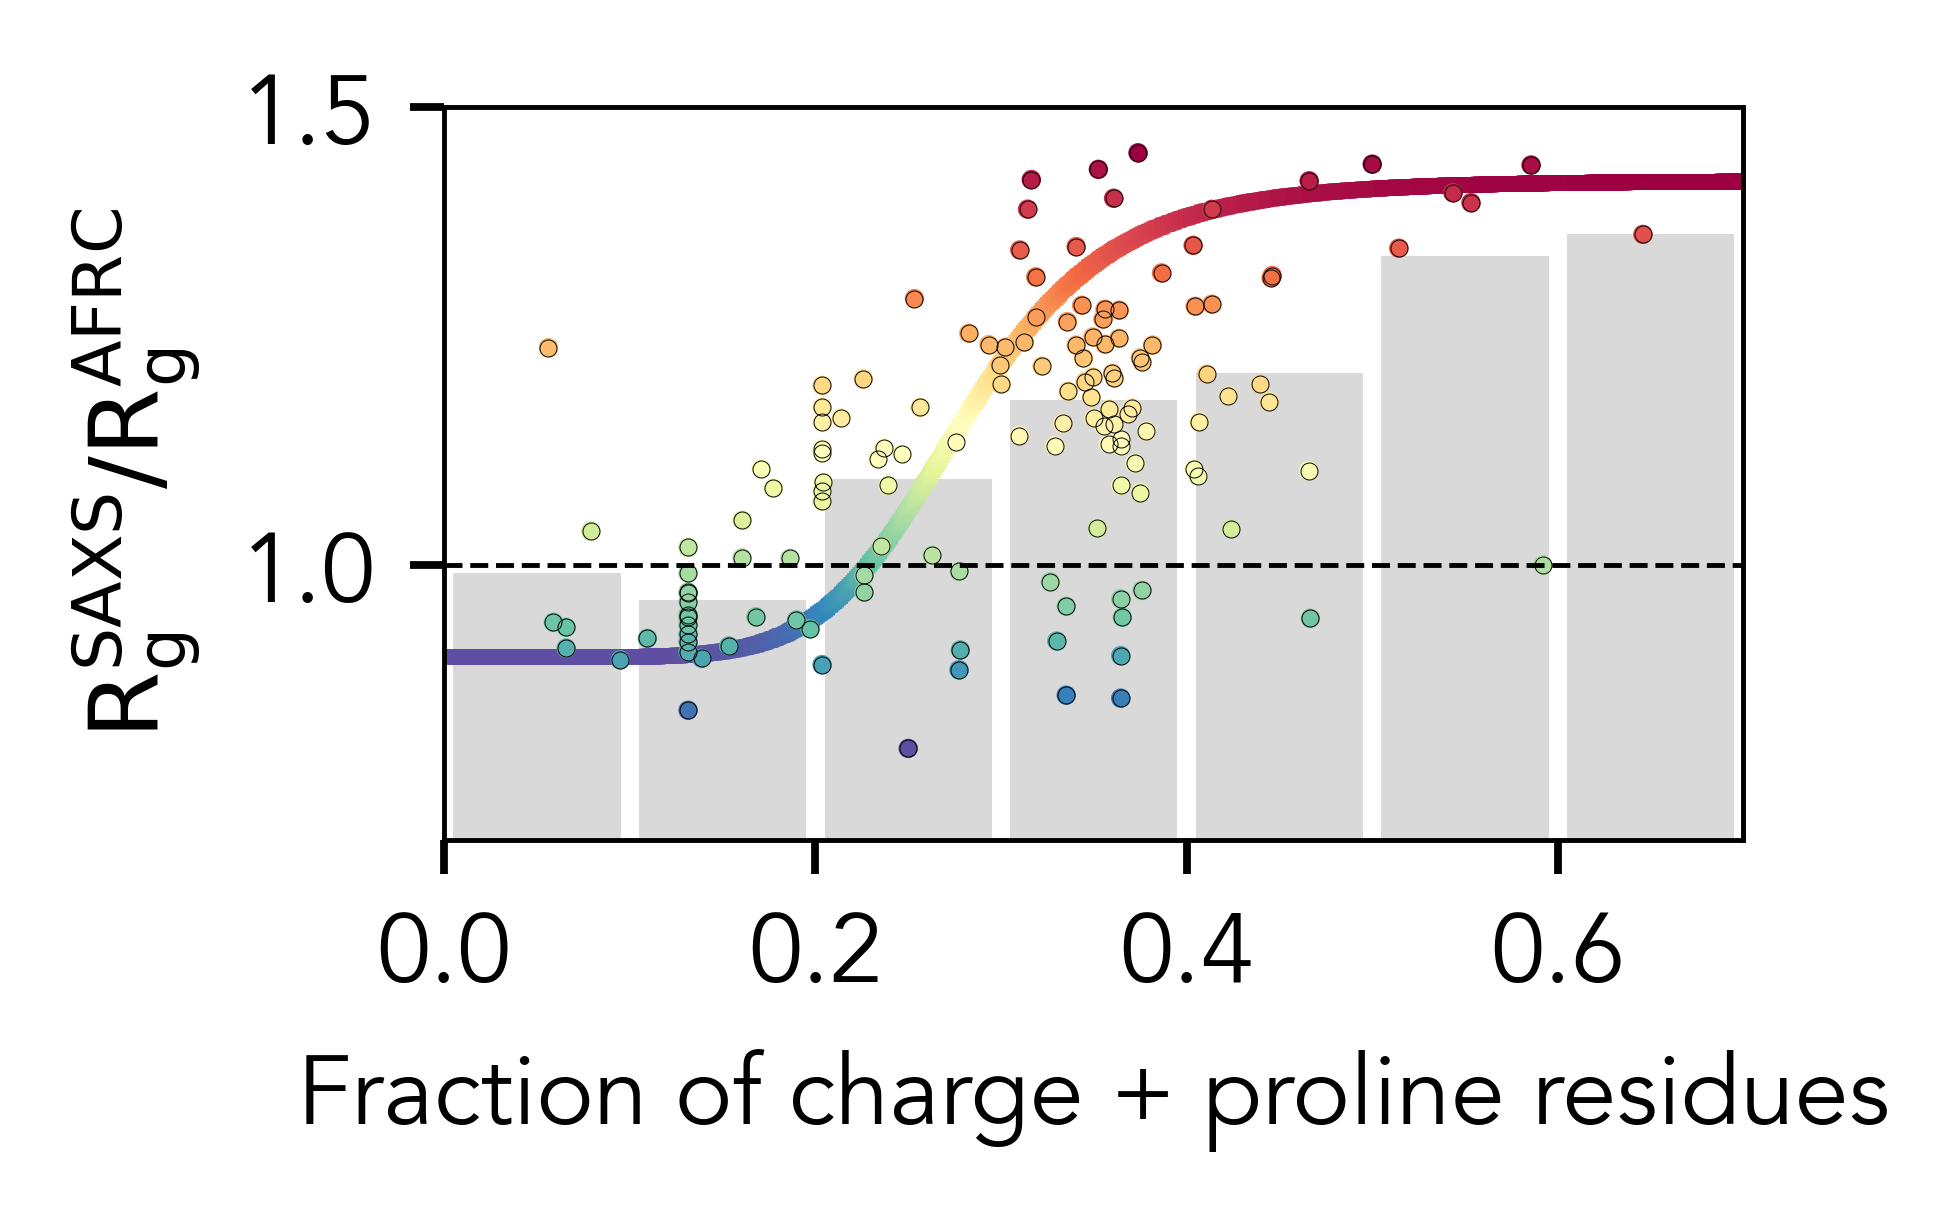

In [14]:
figure(None, (2.7, 1.8), dpi=350)

vals = [Protein(s).FCR + Protein(s).fraction_proline  for s in corrected_seqs]



plt.plot([0,0.75],[1,1],'--k',linewidth=0.5)
pfit = np.polyfit(vals, corrected_norm,1)

local_xvals = np.arange(0,0.85,0.001)

sig = sigmoid(local_xvals, 0.28, 0.52, 7, 0.9)

#plt.plot(local_xvals, sig,'-k', linewidth=0.5)

plt.scatter(local_xvals, sig, c=sig, s=2.5, alpha=1, cmap='Spectral_r', marker='+')

plt.scatter(vals, corrected_norm, c=corrected_norm, s=1, alpha=1, cmap='Spectral_r')
plt.plot(vals, corrected_norm, '.', ms=3.5, mfc='None', mec='k', mew=0.1)
print(np.corrcoef(vals, corrected_norm))

plt.xlim([0,0.75])

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Fraction of charge + proline residues', fontsize=10)
plt.ylabel(r'$\rmR_g^{SAXS} / \rmR_g^{AFRC} $', fontsize=10)

ax = plt.gca()
#ax.axvspan(0.2,0.45, color='k', alpha=0.1, linewidth=0, zorder=-20)


bin_width=0.1
start = 0
end=0.75

vals_bins = np.arange(start, end+bin_width, bin_width)
vals_bins_mean_norm_rg = []
vals_bins_stderr_norm_rg = []
for lower in vals_bins:
    
    tmp = []
    for i in range(len(vals)):
        if vals[i] >= lower and vals[i] < lower+bin_width:
            tmp.append(corrected_norm[i])
            
    vals_bins_mean_norm_rg.append(np.mean(tmp))
    vals_bins_stderr_norm_rg.append(np.std(tmp)/np.sqrt(len(tmp)))

plt.bar(vals_bins+bin_width*0.5,vals_bins_mean_norm_rg, width=bin_width*0.9, alpha=0.15, color='k', zorder=-30)
plt.ylim([0.7, 1.5])
plt.xlim([0, 0.7])
plt.tight_layout()
plt.savefig('panel_9B.pdf')